# L4 - Reinforcement learning

**Reinforcement learning** is one of the machine learning approaches, where our agent learns by interacting with the some environment. In contrast to the supervised learning there are no labeled objects. However, agent can get rewards, making some actions. The goal of the agent is to maximize the total reward over some time period. 

This lab is mainly based on the [book](http://incompleteideas.net/book/bookdraft2018jan1.pdf). You just must read it, if you are interested
in reinforcement learning.

### 1. Multi-armed bandit problem

#### Problem statement
##### Informal
Let we have $N$ slot machines. Playing on the $i$th slot, the agent receives some random reward. The agent doesn't know probability distribution of rewards, however it needs to maximize winnings after $T$ games.

##### Formal
Let $\mathcal{A}$ be a finite set of possible actions. For each action $a \in \mathcal{A}$ agent can get some reward which is determined by the unknown probability distribution $p(r|a)$. The strategy of the agent (policy) at time $t$ is some probability distribution on the set of actions – $\pi_t(a)$.

Games' steps:
> 1. Agent has some initial policy $\pi_1(a)$
> 2. At time  $1 \leq t \leq T$:
> 3. Agent randomly chooses action $a_t \sim \pi_t(a)$
> 4. Gets some reward $r_t \sim p(r|a_t)$
> 5. And update its policy $\pi_t \rightarrow \pi_{t+1}$

Let $c_t(a)$ be how many times action $a$ was used at  moment $t$
$$c_t(a) = \sum_{i=1}^{t}[A_i = a].$$
Then agent needs to minimize its regret
$$T\cdot\mu^* - \sum_a \mu_a \mathbb{E}[c_T(a)]$$
* $\mu_a$ – expected value of reward for action $a$
* $\mu^* = \max_a \mu_a$ – expected value of reward for optimal action

So we can define regrest as following
$$T\cdot\mu^* - \mathbb{E}\big[ \sum_{t=1}^{T} R_t \big].$$

The first task was formulated in this [paper](http://projecteuclid.org/download/pdf_1/euclid.bams/1183517370).
#### Model problem
1. $|A| = 100, T = 1000$
2. $\mu_a \sim \mathcal{N}(0, 1)$
3. $p(r|a) = \mathcal{N}(r; \mu_a, 1)$

The game simulated $10^4$ times and we are interesting in plot **[step]** $\times$ **[average total reward at current step]**.

1. $Q_t(a)$ – average reward of action $a$ by moment $t$ (value of action), $\lim_{c_t(a) \rightarrow \infty} Q_t(a) =\mu_a$.
2. $Q^*(a) = \lim_{t \rightarrow \infty} Q_t(a) = \mu_a$ – value of cation $a$.
3. $\mathcal{A}_t = \arg\max_a Q_t(a)$ – set of actions that has the greatest average reward at moment $t$.

#### Greedy policy
$$\pi_t(a)= \frac{1}{|\mathcal{A}_t|}[a \in \mathcal{A}_t].$$

#### Exercises
1. Implement gready policy.
2. What are main disadvantages?
3. How do you init $\pi$? Is there any better option?
4. Check this policy on model problem.

Since the policy is to play best so far at every game, it can get stuck at some machine which is best of the ones we tried but is still far from best possible.
One way of initializing $\pi$ is by initializing $Q_0(a) = 0 \ \forall a$, that way all elements will be in $A_0$ and every machine gets the same chance of being picked in the first game.
The other strategy may be to initialize $Q_0(a) = \theta \  \forall a$, that way even if a "good" machine is found, we will greedily keep picking next random machines till reward becomes greater than $\theta$

In [1]:
import numpy as np
import scipy.linalg as sla
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
def softmax(array):
    exp = np.exp(array)
    exp /= np.sum(exp)
    return exp

colors = ['#19647E', '#439A86', '#FFD866', '#A5CC33', '#E15A97', \
               '#FFFD98', '#5A3082', '#70D6FF', '#FFA552', '#5F5AA2']


In [3]:
A = 100
T = 1000
mu, sigma = 0, 1
mean = np.random.normal(mu, sigma, A)
r_sum = np.zeros((A))
c = np.zeros((A))
q = np.zeros((A))
A_t = [i for i in range(A)]

def Argmax(arr, A_t):
    m = np.max(arr)
    A_t.clear()
    for i in range(len(arr)):
        if arr[i] == m:
            A_t.append(i)
    return A_t

In [4]:
def step(policy, rewards, mean, c, r_sum, q, t, A_t, eps=None, rev=None):
    a = policy(A_t, A, eps)
    r = np.random.normal(mean[a], sigma)
    c[a] += 1
    r_sum[a] += r
    q[a] = r_sum[a] / c[a]
    A_t =  Argmax(q, A_t)
    rewards[t + 1] = rewards[t] + r

In [5]:
def greedy_policy(A_t, A, eps=None):
    l = len(A_t)
    return np.random.choice(A, p=[(1/l if i in A_t else 0) for i in range(A)])

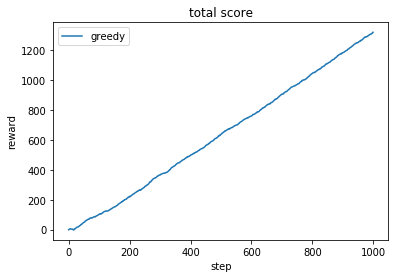

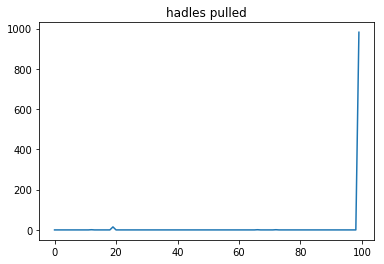

In [8]:
r_sum = np.zeros((A))
c = np.zeros((A))
q = np.zeros((A))
A_t = [i for i in range(A)]
rewards = np.zeros((T + 1))
for t in range(T):
    step(greedy_policy, rewards, mean, c, r_sum, q, t, A_t)
    
plt.title("total score")    
plt.plot(np.arange(T), rewards[1 : ], label = "greedy")
plt.xlabel("step")
plt.ylabel("reward")
plt.legend()
plt.show()   

plt.title("hadles pulled")
plt.plot(range(100), c)
plt.show()   


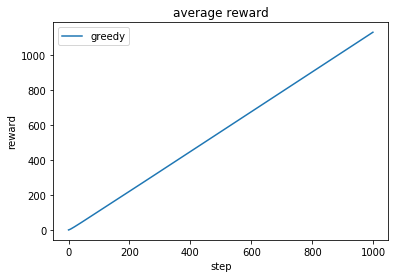

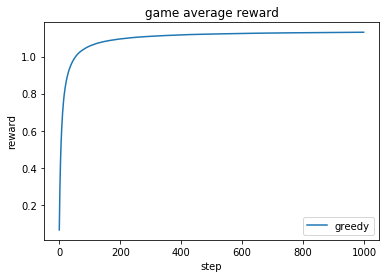

In [9]:
reward_average = np.zeros((T + 1))
for i in range(10000):
    r_sum = np.zeros((A))
    c = np.zeros((A))
    q = np.zeros((A))
    A_t = [i for i in range(A)]
    rewards = np.zeros((T + 1))
    for t in range(T):
        step(greedy_policy, rewards, mean, c, r_sum, q, t, A_t)
    reward_average += rewards    
reward_average /= 10000      
game_reward_average = [(reward_average[i] / (i + 1)) for i in range(len(reward_average))]
plt.title("average reward") 
plt.plot(np.arange(T), reward_average[1 : ], label = "greedy")
plt.xlabel("step")
plt.ylabel("reward")
plt.legend()
plt.show()

plt.title("game average reward") 
plt.plot(np.arange(T), game_reward_average[1 : ], label = "greedy")
plt.xlabel("step")
plt.ylabel("reward")
plt.legend()
plt.show()   

In [ ]:
'''
def step(policy, rewards, mean, c, r_sum, q, t, A_t, eps=None):
    a = policy(A_t, A, eps)
    r = np.random.normal(mean[a], sigma)
    c[a] += 1
    r_sum[a] += r
    q[a] = r_sum[a] / c[a]
    A_t =  Argmax(q, A_t)
    rewards[t + 1] = rewards[t] + r
    print("machine num: ", a, "reward: ", r)
    print("handle pulls:")
    print(c)
    print("machine reward sum: ")
    print(r_sum)
    print("mahine reward average")
    print(q)
    print("best machines: ", A_t)
'''    

#### $\varepsilon$-greedy policy
The previous approach only exploits the environment. However, agent should spend some time learning probability distribtion of rewards, to maximize its reward in the long term. Thus is a question of balance **exploration** and **exploitation**.

Possible improvement:
$$\pi_t(a)=\frac{1-\varepsilon}{|\mathcal{A}_t|}[a \in A_t] + \frac{\varepsilon}{|\mathcal{A}|},\ \varepsilon \in [0, 1].$$

#### Exercises
1. Implement this policy.
2. What happens if you increase $\varepsilon$?
3. How do you change $\varepsilon$ during agent learning?
4. Check this policy on model problem, using different $\varepsilon$.

In [10]:
def get_average(epsilons, policy, method):
    fig = plt.figure(figsize=(10,10))
    iters = 10000
    avg_rewards = []
    idx = 0
    for eps in epsilons:
        reward_average_eps = np.zeros((T + 1))
        for i in range(iters):
            r_acumulated = np.zeros((T + 1))   #Gradient
            rev = np.ones((A))                 #UCB
            r_sum = np.zeros((A))
            c = np.zeros((A))
            q = np.zeros((A))
            A_t = [i for i in range(A)]
            rewards = np.zeros((T + 1))
            for t in range(T):
                step(policy, rewards, mean, c, r_sum, q, t, A_t, eps, rev) 
            reward_average_eps += rewards    
        reward_average_eps /= iters   
        avg_rewards.append(reward_average_eps)
        lbl = "epsilon=" + str(eps) + " " + method
        idx += 1
        plt.plot(np.arange(T), reward_average_eps[1 : ], label = lbl, color=colors[idx])
    plt.title("average reward")    
    plt.xlabel("step")
    plt.ylabel("reward")
    plt.legend()
    plt.show()  

    for i in range(len(epsilons)):
        game_reward_average = [(avg_rewards[i][j] / (j + 1)) for j in range(len(reward_average_eps))]
        lbl = "epsilon=" + str(epsilons[i]) + " " + method
        plt.plot(np.arange(T), game_reward_average[1 : ], label = lbl, color=colors[i])
    plt.title("game average reward")     
    plt.xlabel("step")
    plt.ylabel("reward")
    plt.legend()
    plt.show()       

In [11]:
def eps_greedy_policy(A_t, A, eps):
    l = len(A_t)
    p = np.zeros((A))
    for i in range(A):
            p[i] = eps / A
            if i in A_t:
                p[i] += (1 - eps) / l
    s = np.sum(p)
    p /= s
    return np.random.choice(A, p=p)

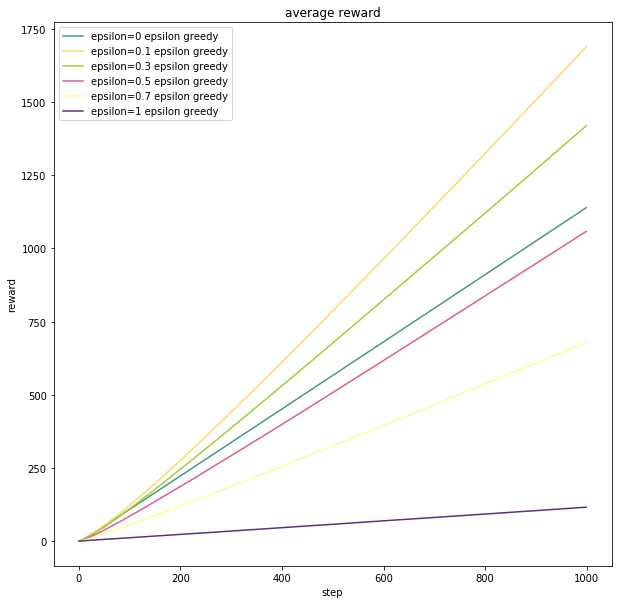

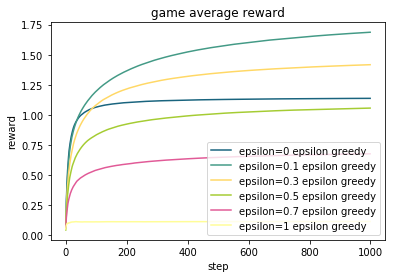

In [12]:
get_average([0, 0.1, 0.3, 0.5, 0.7, 1], eps_greedy_policy, 'epsilon greedy')

In [13]:
def eps_descending_greedy_policy(A_t, A, eps): #for eps > 0.5
    eps -= 0.005
    l = len(A_t)
    p = np.zeros((A))
    for i in range(A):
            p[i] = eps / A
            if i in A_t:
                p[i] += (1 - eps) / l
    s = np.sum(p)
    p /= s
    return np.random.choice(A, p=p)

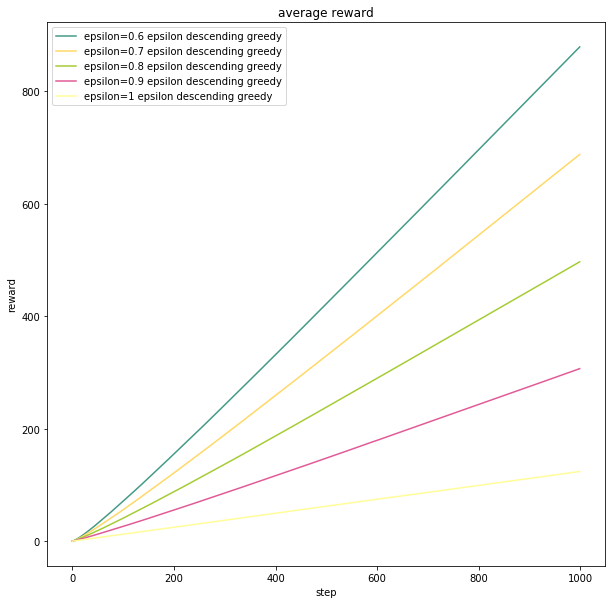

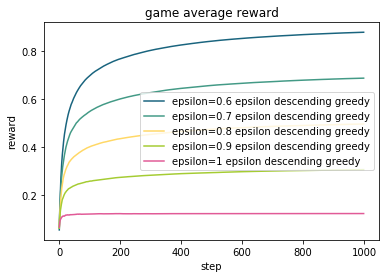

In [14]:
get_average([0.6, 0.7, 0.8, 0.9, 1], eps_descending_greedy_policy, 'epsilon descending greedy')

#### Softmax
One more interpretation of $\varepsilon$-greedy policy

$$\pi_t(a)=\frac{\exp(\frac{1}{\varepsilon} \cdot Q_t(a))}{\sum_{b} \exp(\frac{1}{\varepsilon} \cdot Q_t(b))},\ \varepsilon >0.$$

#### Exercises
1. Implement this policy.
2. What happens if $\varepsilon \rightarrow 0$? What about $\varepsilon \rightarrow \infty$?
3. Compare softmax and $\varepsilon$-greedy policy on model problem.

In [17]:
def softmax_policy(A_t, A, eps):
    exp = q / eps 
    p = softmax(exp)
    return np.random.choice(100, p=p)

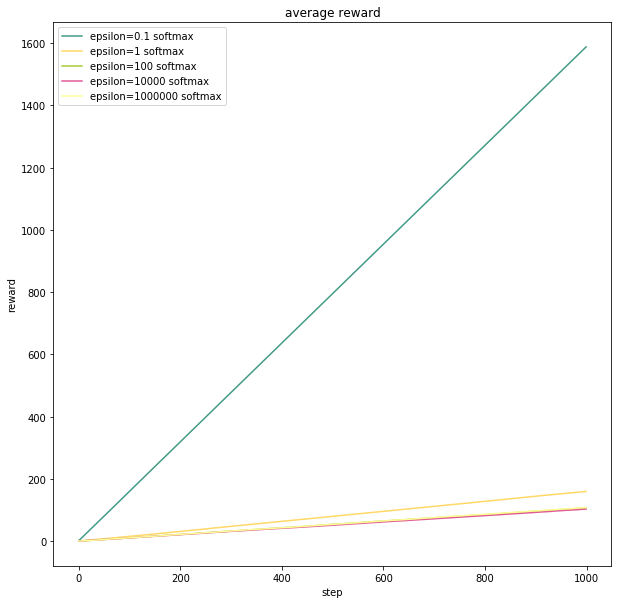

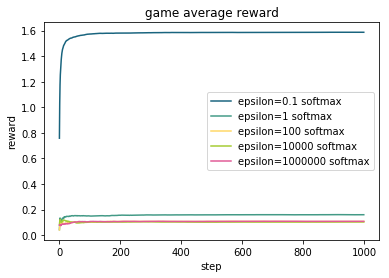

In [18]:
get_average([0.1, 1, 100, 10000, 1000000], softmax_policy, 'softmax')

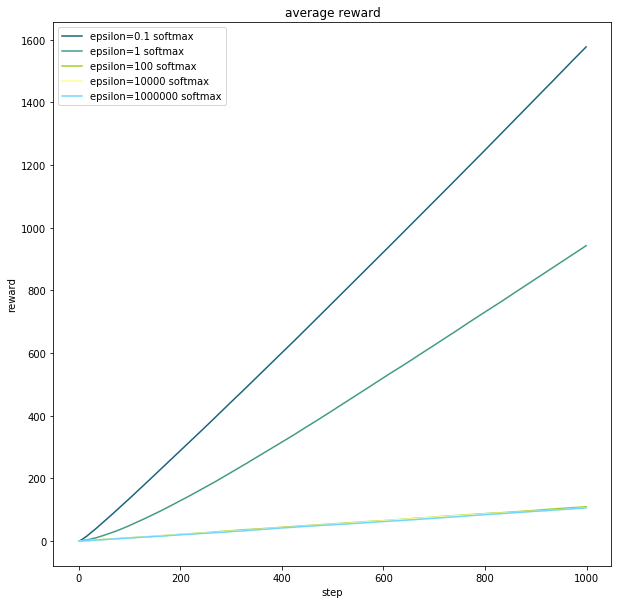

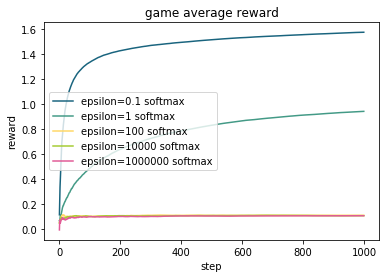

In [19]:
fig = plt.figure(figsize=(10,10))
avg_rewards = []
epsilons = [0.1, 1, 100, 10000, 1000000]
for eps in epsilons:
    reward_average_eps = np.zeros((T + 1))
    for i in range(500):
        r_sum = np.zeros((A))
        c = np.zeros((A))
        q = np.zeros((A))
        A_t = [i for i in range(A)]
        rewards = np.zeros((T + 1))
        for t in range(T):
            step(softmax_policy, rewards, mean, c, r_sum, q, t, A_t, eps) 
        reward_average_eps += rewards    
    reward_average_eps /= 500   
    avg_rewards.append(reward_average_eps)
    lbl = "epsilon=" + str(eps) + " softmax"
    plt.plot(np.arange(T), reward_average_eps[1 : ], label = lbl, color=colors[int(np.log10(eps) + 1)])
plt.title("average reward")    
plt.xlabel("step")
plt.ylabel("reward")
plt.legend()
plt.show()   

plt.title("game average reward") 
for i in range(5):
    game_reward_average = [(avg_rewards[i][j] / (j + 1)) for j in range(len(reward_average))]
    lbl = "epsilon=" + str(epsilons[i]) + " softmax"
    plt.plot(np.arange(T), game_reward_average[1 : ], label = lbl, color=colors[i])
plt.xlabel("step")
plt.ylabel("reward")
plt.legend()
plt.show()  

#### UCB (upper confidence bound)
For each moment $t$ agent defines the most potentially profitable actions. Agent choice of $a \in A_t$ in accordance with following rule
$$\mathcal{A}_t = \arg\max Q_t(a) + \varepsilon \sqrt{\frac{2 \ln t}{c_t(a)}},\ \varepsilon \geq 0$$

The first part is well known, but the second summand is measure of how accurate agent estimates $Q_t(a)$ at this moment. The policy itself balances between exploration and exploitation. This policy can be considired as optimal in some sense, more inforamtion [here](http://homes.di.unimi.it/~cesabian/Pubblicazioni/ml-02.pdf).

#### Exercises
1. Implement policy.
2. What happens if $\varepsilon \rightarrow 0$? What about $\varepsilon \rightarrow \infty$?
3. Compare this policy with softmax and $\varepsilon$-greedy policy.

In [31]:
def step(policy, rewards, mean, c, r_sum, q, t, A_t, eps=None, rev=None):
    a = policy(A_t, A, eps)
    r = np.random.normal(mean[a], sigma)
    c[a] += 1
    r_sum[a] += r
    q[a] = r_sum[a] / c[a]
    rev[a] = 1 / np.sqrt(c[a]) 
    score = q + eps * np.sqrt(2 * np.log(t)) * rev
    A_t =  Argmax(score, A_t)
    rewards[t + 1] = rewards[t] + r

/Users/arinaruck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/arinaruck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

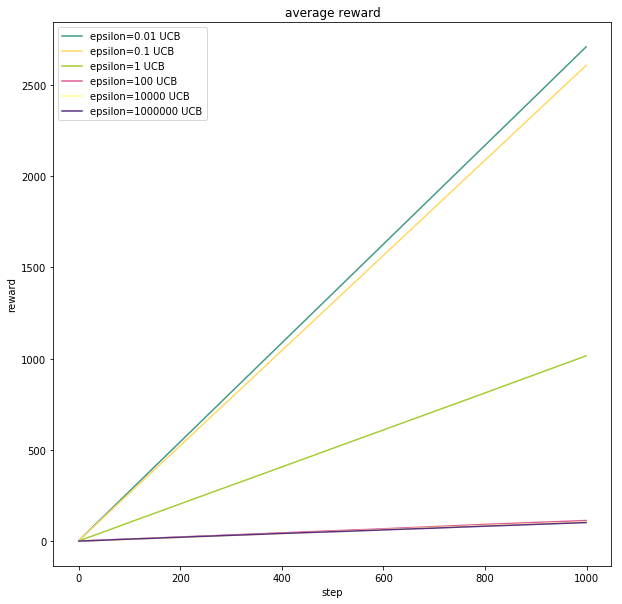

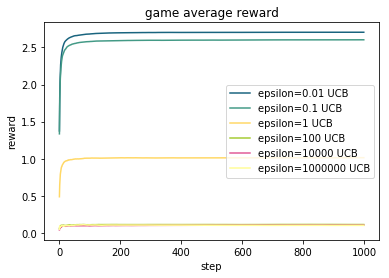

In [32]:
get_average([0.01, 0.1, 1, 100, 10000, 1000000], softmax_policy, 'UCB')

#### Gradient policy
There are also adaptive policies. They can be used, if the environment is not stationary (the distribution of rewards may slowly change). In this case, it is proposed to use the already familiar exponential smoothing
We find smoothed average reward at moment $t$ for all actions:
$$\bar{r}_{t+1} = (1-\alpha_t)\cdot\bar{r}_t+\alpha_t r_{t+1}(a) = \bar{r}_t +\alpha_t (r_{t+1}(a)-\bar{r}_t),\ \alpha_t \in [0, 1].$$

**Hint** Сonvergence condition
* $\sum^{\infty} \alpha_t = \infty$
* $\sum^{\infty} \alpha^2_t < \infty$

By the way, if $\alpha_t = \frac{1}{t}$, then $\bar{r}_{t+1}$ is just average of all $r_t$.

For each action we have some priority $p_t(a)$. After each step we make following update
$$p_{t+1}(a) = p_t(a)+\lambda(r_t-\bar{r}_t)(1-\pi_t(a)), \text{ $a$ is choosen,}$$

$$p_{t+1}(a) = p_t(a)-\lambda(r_t-\bar{r}_t)\pi_t(a), \text{ another case.}$$

So policy $\pi_{t+1}$ looks like:
$$\pi_{t+1}(a) = \frac{\exp(p_{t+1}(a))}{\sum_{b} \exp(p_{t+1}(b))}$$
More details about this method you can find in the book.

#### Exercise
1. Implement policy.
2. In conclusion, try to understand which model is better for our problem.

In [64]:
def step(p, rewards, mean, t, a, lmbd):
    policy = softmax(p)
    a = np.random.choice(A, p=policy)
    r = np.random.normal(mean[a], sigma)
    alpha = 1/t
    r_acc = (1 - alpha) * r_accumulated[t] + alpha * r
    r_accumulated[t + 1] = r_acc 
    p -= lmbd * (r - r_acc) * policy 
    p[a] = p[a] + lmbd * (r - r_acc)*(1 - policy[a])
    rewards[t + 1] = rewards[t] + r

/Users/arinaruck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/arinaruck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/arinaruck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


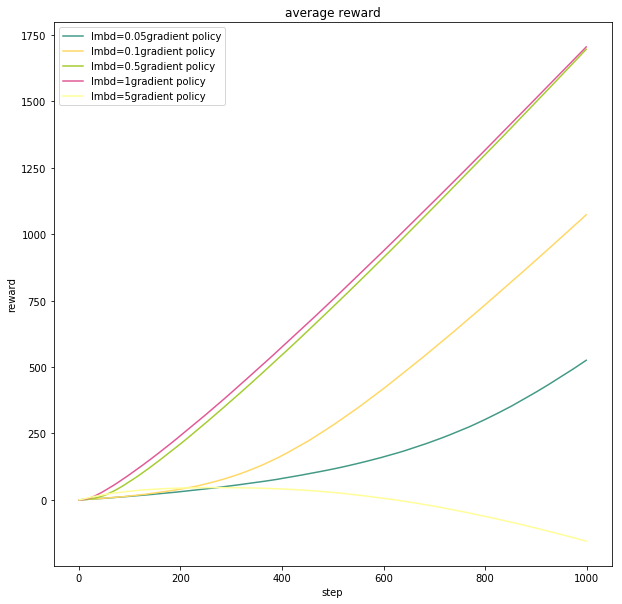

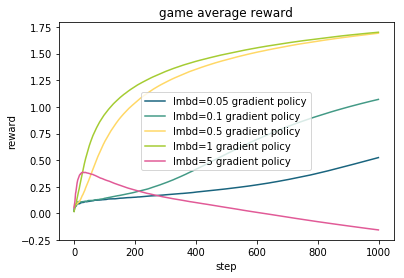

In [65]:
fig = plt.figure(figsize=(10,10))
iters = 1000
avg_rewards = []
lmbds = [0.05, 0.1, 0.5, 1, 5]
idx = 0
for lmbd in lmbds:
    reward_average_eps = np.zeros((T + 2))
    for i in range(iters):
        r_accumulated = np.zeros((T + 2))
        p = np.zeros((A))
        rewards = np.zeros((T + 2))
        a = np.random.choice(A, p=[1/A for i in range(A)])
        for t in range(1, T + 1):
            step(p, rewards, mean, t, a, lmbd)
        reward_average_eps += rewards    
    reward_average_eps /= iters   
    avg_rewards.append(reward_average_eps)
    lbl = "lmbd=" + str(lmbd) + "gradient policy" 
    idx += 1
    plt.plot(np.arange(T), reward_average_eps[2 : ], label = lbl, color=colors[idx])
plt.title("average reward")    
plt.xlabel("step")
plt.ylabel("reward")
plt.legend()
plt.show()  

for i in range(len(epsilons)):
    game_reward_average = [(avg_rewards[i][j] / (j + 1)) for j in range(len(reward_average_eps))]
    lbl = "lmbd=" + str(lmbds[i]) + " gradient policy"
    plt.plot(np.arange(T), game_reward_average[2 : ], label = lbl, color=colors[i])
plt.title("game average reward")     
plt.xlabel("step")
plt.ylabel("reward")
plt.legend()
plt.show()       

### 2. Markov decison process
#### Problem statement
Now agent acts in some environment with finite set of states $\mathcal{S}$. At moment $t$ agent at state $s_t$ can choose action $a_t \in \mathcal{A}_{s_t} \subset \mathcal{A}$. After agent's action, environment moves it to state $s_{t+1}$ and gives reward $r_{t+1}$. Environment behaviour is defined with
$$p(s_{t+1}, r_{t+1}|s_t, a_t)  = \Pr\{ S_{t+1} = s_{t+1}, R_{t+1} =  r_{t+1} | S_t = s_t, A_t = a_t\}.$$

Agent has some policy $\pi$, which at moment $t$ defines probabilty of action $a_t \in \mathcal{A}_{s_t}$ for state $s_t$ $\pi_t(a_t|s_t) = p(a_t|s_t)$. Informally agent needs to maximize the total reward. If the decision process is finite, the problem is formalized as maximizing
$$G = \sum_{t=0}^{T} R_{t+1},$$
here $T$ – moment of time, when agent achives final state. We will consider this value as a random. If the process can last very long or infinite time than we have dealing with a discounted reward
$$ G_t = \sum_{k=0}^{\infty} \gamma^{k} R_{t+k+1},$$
here $\gamma \in [0, 1]$ defines how deep we look into the future.

The probability that the process moves into its new state is influenced by the chosen action. Specifically, it is given by the state transition function. Thus, the next state  depends on the current state and the decision maker's action. But given state and action, it is conditionally independent of all previous states and actions, in other words, the state transitions of an MDP satisfies the Markov property.

#### Exercises
1. Give life example of Markov decision process (it may be any game, etc.).
2. Can you give an example where a decision can't be modeled with a Markov process?
3. Using $p(s_{t+1}, r_{t+1}|s_t, a_t)$, find values below (all distribution are discrete):
  * $r(s_{t}, a_{t}) = \mathbb{E}[R_{t+1}|S_t = s_t, A_t = a_t]$ – average reward for action $a_t$ in state $s_t$ 
  * $p(s_{t+1} | s_t, a_t) = \Pr\{S_{t+1} = s_{t+1} | S_t = s_t, A_t = a_t \}$ – probability to move from $s_t$ to $s_{t+1}$, making $a_t$.
  * $r(s_t, a_t, s_{t+1}) = \mathbb{E}[R_{t+1}|S_{t+1} = s_{t+1}, S_t = s_t, A_t = a_t]$ – average reward when moving from $s_t$ to $s_{t+1}$, making $a_t$.

1) Tic tac toe
2) Non-Newtonian fluid

$$r(s_t, a_t) = \sum_{r \in R} r \sum_{s' \in S}p(s', r\ |\  s_t, a_t)$$


$$p(s_{t+1}| s_t, a_t) = \sum_{r \in R}p(s_{t+1}, r_{t+1}\ | \  s_t, a_t)$$


$$p(s_t, a_t, s_{t+1}) = \sum_{r \in R}r \dfrac{p(r, s_{t+1} \ | \ s_t, a_t)}{p(s_{t+1}| s_t, a_t)}$$

#### Main definitions 
State-value function under the strategy of $\pi$ returns for state $s$ total reward, that agent gets, starting from $s$
$$V^\pi(s) = \mathbb{E}[G_t|S_t=s] = \mathbb{E}\Big[\sum_{k=0}^{\infty} \gamma^{k+1}R_{t+k+1}|S_t=s\Big].$$

Action-value function under the strategy $\pi$ for action $a$ and state $s$ returns total reward that agent gets, starting from $s$ and making $a$
$$Q^\pi(s, a) = \mathbb{E}[G_t|S_t=s, A_t=a] = \mathbb{E}\Big[\sum_{k=0}^{\infty} \gamma^{k+1}R_{t+k+1}|S_t=s,  A_t=a\Big].$$

Thus we have following equations (the first two are Bellman equations):

$$V^{\pi}(s) = \mathbb{E}\big[R_{t+1} + \gamma V^{\pi}(S_{t+1}) | S_t=s\big]$$

$$Q^{\pi}(s, a) = \mathbb{E}\big[R_{t+1} + \gamma Q^{\pi}(S_{t+1}, A_{t+1}) | S_t=s, A_t=a\big]$$

$$Q^{\pi}(s, a) = \mathbb{E}\big[R_{t+1} + \gamma V^{\pi}(S_{t+1}) | S_t=s, A_t=a\big]$$

#### Remark
It is important to note that policy $\pi$ is fixed and doesn't change with time. Although in real practice it is not true, because our strategy is constantly updating when agent learns environment.
Policy $\pi^{*}$ is optimal, if for each state $s$ and any other policy $\pi$ it is true that $V_{\pi^{*}}(s) \geq V_{\pi}(s)$. Posibly, there are several different optimal policies, however functions $V(s)$ and $Q(s, a)$, which they defines are the same. So, we denote these functions $V^*(s)$ и $Q^*(s, a)$ as optimal.

Equations below are Bellman optimality equations (more info [here](https://en.wikipedia.org/wiki/Bellman_equation):
$$V^*(s) = \max_{a \in \mathcal{A}} \mathbb{E}\big[R_{t+1} + \gamma V^*(S_{t+1}) | S_t=s, A_t=a\big]$$
$$Q^*(s, a) = \mathbb{E}\big[R_{t+1} + \gamma \max_{b \in \mathcal{A}} Q^*(S_{t+1}, b) | S_t=s, A_t=a\big]$$

Then the following two greedy strategies are equivalent and optimal ($\mathcal{A}_t$ – set):
$$\mathcal{A}_t = \arg\max_{a \in \mathcal{A}} \mathbb{E}\big[R_{t+1} + \gamma V^*(s_{t+1}) | s_t, a \big]$$
$$\mathcal{A}_t = \arg\max_{a \in \mathcal{A}} Q^*(s_t, a)$$

#### Dynamic programming
This part is based on the fact, that $p(s',r|s,a)$ is known.

#### Iterative policy evaluation
Let agent have some fixed policy $\pi$, then for $V^{\pi}$ we have
$$V^{\pi}(s) = \sum_a \pi(a|s) \sum_{s',r} p(s',r|s,a) \big[r + \gamma V^{\pi}(s') \big]$$

For simplicity we assume that the distribution of rewards is discrete random variable. Otherwise, it is necessary to use operator of integration instead of sum. For each state $s$ we can can evaluate $V^{\pi}$, using iterative algorithm ($V_0$ is initialized randomly)
$$V_{n+1}(s) = \sum_a \pi(a|s) \sum_{s',r} p(s',r|s,a) \big[r + \gamma V_n(s') \big].$$

By the way, if $s$ is a final state, then $V(s)$ is already known and we may use this value as initialization for faster convergence. The computation stops when $V(s)$ varies negligible from iteration to iteration.

#### Remarks
1. We make assumption that $p(s',r|s,a)$ is known, but it's often not truth in practice.
2. Compution of $V_{n+1}$ can be done **in place**, it accelerates convergence, since in the process of computation we will use the values from iteration $n$ and some new values from iteration $n+1$.

#### Policy improvement theorem
Suppose there are policies $\pi$ and $\pi'$, and for each state $s$ we have
$$Q^{\pi}(s, \pi'(s)) \geq V^{\pi}(s),$$
then the following inequality holds
$$V^{\pi'}(s) \geq V^{\pi}(s).$$

The main interest of this theorem is that it allows us to improve the current policy. We know how to calculate $V^{\pi}(s)$, so

$$
Q^{\pi}(s, a) =
\mathbb{E}\big[R_{t+1} + \gamma V^{\pi}(S_{t+1}) | S_t=s, A_t=a\big] =
\sum_{s',r}p(s',r|s, a)\big[ r + \gamma V^{\pi}(s') \big]
$$

In this way we can improve our policy
$$\pi'(s) = \arg\max_a Q^{\pi}(s, a).$$
The writing above means, that policy chooses action uniformly among all optimal actions. If we can't improve $V^{\pi}$, then out state-value function is optimal and satisfies the equation the Bellman equation. So, policy, which defines this policy, is also optimal.

#### Policy interation
Performing alternately calculation of $V^{\pi}$ and improving $\pi$, we can find optimal policy $\pi^*$. It should be noted that as initialization values of $V(s)$ you may use state-value function from previous iteration, it helps significantly speeds up the convergence of the algorithm.

#### Value interation
There is also interesting approach to compute $V^{*}(s)$ of optimal strategy $\pi^{*}$
$$V_{n+1}(s) = \max_a \sum_{s',r} p(s',r|s,a) \big[r + \gamma V_n(s') \big].$$

You may understand this method in the following way. On the one hand we in greedy manner update state value function during each iteration of value function evaluation. On the other hand we use Bellman equation to evaluate $V^{*}$ iteratively. It's rather practical method.

#### Exercises
1. Let your environment have 100 states. The distribution function $p(s',r|s,a)$ may be defined by your own.
2. Fix some discount value and find optimal policy.
3. What method is faster? For any state $s$, check how $V^*(s)$ varies during $\gamma$ changing.
4. Plot $\gamma \times V^*(s)$ for some 5 states.

Let's think of a gridworld or a grid 10 $\times$ 10, from each cell we can move in four directions: n (north), s (south), e (east), w (west). d. Actions that would take the agent off the grid leave its location
unchanged, but also result in a reward of −1. Other actions result in a reward of 0, except those that
move the agent out of the special states A1 and B1. From state A1, all four actions yield a reward of +10
and take the agent to A2. From state B1, all actions yield a reward of +5 and take the agent to B2.
The goal is to get as much reward as possible in fixed amount of steps

In [80]:
from numpy.random import randint

side = 10

def set_grid():
    grid = np.zeros((side + 2, side + 2))
    grid[0, :] = -1
    grid[:, 0] = -1
    grid[-1, :] = -1
    grid[:, -1] = -1
    x = []
    y = []
    for i in range(4):
        x.append(randint(1, side + 1))
        y.append(randint(1, side + 1)) 
    grid[x[0], y[0]] = 10
    grid[x[2], y[2]] = 5
    return x, y, grid

def next_state(grid, points, i, j, act):
    if (i, j) == points[0]:
        return points[1][0], points[1][1]
    if (i, j) == points[2]:
        return points[3][0], points[3][1]
    if (i == 1 and act == 'n') or (j == 1 and act == 'w') or \
       (i == side and act == 's') or (j == side and act == 'e'):
        return (i, j)
    if act == 'n':
        return (i - 1, j)
    if act == 's':
        return (i + 1, j)
    if act == 'w':
        return (i, j - 1)
    return i, j + 1

def upd_reward(grid, points, V, i, j, gamma):
    rwd = 0.0
    for act in ['n', 's', 'w', 'e']:
        i_n, j_n = next_state(grid, points, i, j, act)
        if (i_n == i) and (j_n == j):
            rwd += -1
        else: 
            rwd += grid[i, j]
        rwd += V[i_n, j_n] * gamma   
    rwd *= 0.25    
    return rwd
    

def get_V(grid, points, gamma=0.9, eps=0.1):
    V = grid.copy()
    while 42:
        max_diff = 0
        for i in range(1, side + 1):
            for j in range(1, side + 1):
                prev = V[i, j]
                V[i, j] = upd_reward(grid, points, V, i, j, gamma)
                diff = abs(V[i, j] - prev)
                max_diff = max(max_diff, diff) 
            '''
            print()
            for i in range(side + 2):
                for j in range(side + 2):
                    print('{:.2f} '.format(V[i, j]), end='\t')
                print()
            print()
            '''
        if max_diff < eps:
            break
    return V
   
def get_action(grid, points, V, i, j, gamma):
    Q = []
    actions = ['n', 's', 'w', 'e']
    for act in actions:
        i_n, j_n = next_state(grid, points, i, j, act)
        Q.append(grid[i, j] + gamma * V[i_n, j_n])
    idx = np.argmax(Q)
    #print(i, j, Q, actions[idx])
    return actions[idx]


def get_policy(V, grid, gamma=0.9):
    policy = np.zeros((side, side), dtype=str)
    for i in range(side):
        for j in range(side):
            policy[i, j] = get_action(grid, points, V, i + 1, j + 1, gamma)
    return policy 

def random_policy(s):
    actions = ['n', 's', 'w', 'e']
    idx = np.random.choice(range(4), p=[0.25, 0.25, 0.25, 0.25])
    return actions[idx]
    
def get_score(policy, grid, points, s_0, step_num=1000):
    steps = 0
    score = 0
    s = s_0.copy()
    while steps < step_num:
        i, j = s
        score += grid[i, j]      
        act = policy(s)
        s = next_state(grid, points, i, j, act)
        steps += 1
    return score


In [71]:
x, y, grid = set_grid()

print("\nThe grid:\n")

print(grid)

points = [(x[i], y[i]) for i in range(4)]

#points = [(1, 2), (5, 2), (1, 4), (3, 4)]


s_0 = [randint(1, side + 1), randint(1, side + 1)]

print("\nRandom starting point: ", s_0)

V = get_V(grid, points)

'''
for i in range(side + 2):
    for j in range(side + 2):
        print('{:.2f} '.format(V[i, j]), end='\t')
    print()
'''

policy = get_policy(V, grid)

print("\nOptimal policy: \n")
print(policy)

def opt_policy(s):
    return policy[s[0] - 1, s[1] - 1]


score_random = get_score(random_policy, grid, points, s_0)
print("\nRandom policy score: ", score_random)
score_opt = get_score(opt_policy, grid, points, s_0)
print("\nOptimal policy score: ", score_opt)


The grid:

[[ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.]
 [ -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.]
 [ -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.]
 [ -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.]
 [ -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.]
 [ -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.]
 [ -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  10.  -1.]
 [ -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.]
 [ -1.   0.   0.   0.   0.   0.   5.   0.   0.   0.   0.  -1.]
 [ -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]]

Random starting point:  [5, 8]

Optimal policy: 

[['s' 's' 's' 's' 's' 's' 's' 's' 's' 's']
 ['e' 'e' 's' 's' 's' 's' 's' 's' 's' 'w']
 ['e' 'e' 's' 's' 's' 's' 's' 's' 's' 's']
 ['e' 'e' 'e' 's' 's' 's' 's' 's' 's' 's']
 ['e' 'e

In [81]:
def test(gamma):
    sum_random = 0
    sum_opt = 0
    for i in range(100):
        x, y, grid = set_grid()
        points = [(x[i], y[i]) for i in range(4)]
        s_0 = [randint(1, side + 1), randint(1, side + 1)]
        V = get_V(grid, points)
        policy = get_policy(V, grid)
        def opt_policy(s):
            return policy[s[0] - 1, s[1] - 1]
        score_random = get_score(random_policy, grid, points, s_0)
        sum_random += score_random
        score_opt = get_score(opt_policy, grid, points, s_0)
        sum_opt += score_opt
    print("Average random policy score: ", sum_random // 100) 
    print("Average optimal policy score: ", sum_opt // 100) 

In [83]:
for gamma in [0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]:
    print("\ngamma: ", gamma)
    test(gamma)


gamma:  0.5
Average random policy score:  72.0
Average optimal policy score:  1683.0

gamma:  0.75
Average random policy score:  111.0
Average optimal policy score:  1473.0

gamma:  0.8
Average random policy score:  317.0
Average optimal policy score:  1451.0

gamma:  0.85
Average random policy score:  380.0
Average optimal policy score:  1580.0

gamma:  0.9
Average random policy score:  139.0
Average optimal policy score:  1633.0

gamma:  0.95
Average random policy score:  139.0
Average optimal policy score:  1574.0

gamma:  0.99
Average random policy score:  260.0
Average optimal policy score:  1469.0


### 3. Model problem
As a model problem we choose tic-tac-toe game. One agent plays against another, so environament for each player is its opponent. The set of states $\mathcal{S}_{X}$ is all possible positions of tic-tac-toe game for Xs and the set $\mathcal{S}_{O}$ defined in the same way for Os. You need to train both agents during some series of games where they play with each other. The criterion of success – both agents don't lose to human.

### 4. Temporal difference
The speech will focus on more practical methods. Let imagine that we evaluate $V^{\pi}(s)$ for our policy $\pi$. Our agent visited state $s_t$ and we know total reward $G_t$. When agent visites the state $s_t$, we can improve estimation of $V^{\pi}$ using exponential smoothing
$$V^{\pi}_{n+1}(s_t) = V_{n}^{\pi}(s_t) + \alpha \big(G_t - V_{n}^{\pi}(s_t)\big).$$

However, you can make some trick and rewrite $G_t$
$$V_{n+1}^{\pi}(s_t) = V_{n}^{\pi}(s_t) + \alpha \big(R_t + \gamma V^{\pi}(S_{t+1}) - V_{n}^{\pi}(s_t)\big),$$
so we can update $V^{\pi}(s_t)$ after each visiting $s_t$. Similarly, we can compute
$$Q_{n+1}(s_t, a_t) = Q_{n}(s_t, a_t) + \alpha \big(R_{t+1} + \gamma Q^{\pi}(S_{t+1}, A_{t+1}) - Q_{n}^{\pi}(s_t, a_t)\big).$$

#### SARSA (State-Action-Reward-State-Action)
So, we want to find optimal policy $\pi^{*}$. Let's suppose we have some initial approximation $Q(s, a)$. We use $\varepsilon$-greedy policy $\mathcal{A}_s = \arg\max_{a \in \mathcal{A}} Q(s, a)$. 

$$\pi(a|s)=\frac{1-\varepsilon}{|\mathcal{A}_s|}[a \in \mathcal{A}_s] + \frac{\varepsilon}{|\mathcal{A}|},\ \varepsilon \in [0, 1].$$

In accordance with policy $\pi$ we choose $a_t$ and get reward $R_{t+1}$, after that environment moves agent to state $S_{t+1}$. Agent one more time choose action $A_{t+1} \sim \pi(a|S_{t+1})$ and doesn't act in the environemnt, but only update $Q$ function
$$Q(s_t, a_t) = Q(s_t, a_t) + \alpha \big(R_{t+1} + \gamma Q^{\pi}(S_{t+1}, A_{t+1}) - Q^{\pi}(s_t, a_t)\big).$$

Also, there is more variation of this idea, that uses expected Q-value.
$$Q(s_t, a_t) = Q(s_t, a_t) + \alpha \big(R_{t+1} + \gamma \sum_b \pi(b|S_{t+1}) Q^{\pi}(S_{t+1}, b) - Q^{\pi}(s_t, a_t)\big).$$
So we use $\varepsilon$-greedy approach to improve our policy and evaluate.

####  Q-learning
The idea of this method is rather similar, but we also greedy update action-value function $Q$ 
$$Q(s_t, a_t) = Q(s_t, a_t) + \alpha \big(R_{t+1} + \gamma \max_{b} Q(S_{t+1}, b) - Q(s_t, a_t)\big).$$ For choosing actions during learning agent can use any policy, e.g. $\varepsilon$-greedy or softmax policy.

#### Exercises
1. Implement both algorithm for our model problem.
2. Which one converges faster? How can you estimate it?
3. Compare how action-value function $Q(s_t, a_t)$ differs for these two methods.
4. Try to play with your agents...
5. Use intentionally losing strategy for Os. What happened?
6. Try to beat the agent for Xs.

In [25]:
n = 5
field = np.zeros((n, n), dtype=np.int)

def pos_to_idx(x, y, n):
    return x * n + y

def idx_to_pos(i, n):
    return i // n, i % n
def get_rotations(n):
    for i in range(n):
        for j in range(n):
            field[i, j] = pos_to_idx(i, j, n)
    rotated_field = field.copy()
    idx = 0
    for j in range(n - 1, -1, -1):
        for i in range(n):
            rotated_field[i, j] = field[idx_to_pos(idx, n)]
            idx += 1        
    rotate_90 = np.zeros((n * n), dtype=np.int)
    for i in range(n * n):
        rotate_90[i] = rotated_field[idx_to_pos(i, n)]
    rotate_180 = rotate_90.copy()
    for i in range(n * n):
        idx = rotate_180[i]
        rotate_180[i] = rotate_90[idx]
    rotate_270 = rotate_180.copy()
    for i in range(n * n):
        idx = rotate_270[i]
        rotate_270[i] = rotate_90[idx]
    return rotate_90, rotate_180, rotate_270

rotate_90, rotate_180, rotate_270 = get_rotations(n)
print(rotate_90)
print(rotate_180)
print(rotate_270)

[20 15 10  5  0 21 16 11  6  1 22 17 12  7  2 23 18 13  8  3 24 19 14  9  4]
[24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]
[ 4  9 14 19 24  3  8 13 18 23  2  7 12 17 22  1  6 11 16 21  0  5 10 15 20]


In [ ]:
from Tkinter import *
from tkk import Entry, Button

class Main():
    def __init__(self, parent):
        self.parent = parent
        self.createWidgets()
        
    def createWigets(self):
        pad = 10
        self.mainFrame = Frame(self.parent)
        Label(self.mainFrame. text='Tic Tac Toe').pack()
        self.mainFrame.pac(padx=pad, pady=pad)
        
if __name__ == '__main__':
    root = Tk()
    Main(root)
    root.mainloop()